# Wine Price Prediction - Model Demo


## Data and Use case

[**Wine Reviews** - 130k wine reviews with variety, location, winery, price, and description](https://www.kaggle.com/zynicide/wine-reviews/home)

This dataset is available on Kaggle and contains around 130k of wine reviews. The data was scraped from [WineEnthusiast](http://www.winemag.com/?s=&drink_type=wine) on November 22nd, 2017.

I plan to use this dataset to develop a model that predicts wine price for specified set of parameters, like wine variety, region, desired quality. Such model, may be integrated into an application that runs on a mobile device to suggest price range during wine shopping without need to do online search.

## Price Prediction Demo

Let's call the model we created and deployed on WML. First, authenticate to the WML service on IBM Cloud.

In [1]:
# @hidden_cell
service_url = "https://us-south.ml.cloud.ibm.com"
user = "7c13d4a6-2162-4ea1-a54c-be778f2f212b"
password =  "2a5c712c-868d-4dd0-b5e8-a486271c7d0d"
instance_id =  "c9424f5f-0323-4aa3-87e1-eae64d00164b"

In [2]:
wml_credentials={
  "url": service_url,
  "username": user,
  "password": password,
  "instance_id": instance_id
}

### Instantiate WML client

In [3]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

wml_client = WatsonMachineLearningAPIClient(wml_credentials)

# the online scoring endpoint.
model_scoring_url = 'https://us-south.ml.cloud.ibm.com/v3/wml_instances/c9424f5f-0323-4aa3-87e1-eae64d00164b/deployments/5cac7bd6-a611-427d-8c18-240bb85287fb/online'

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Let's load the demo data. It's 100 records randomly sampled from the dataset.

In [4]:
import pandas as pd

demo_df = pd.read_csv('wp-demo-data.csv')

In [5]:
import numpy as np

def score(inputs):
    print('\nCalling the model on WML...')
    # Score data
    scoring_data = {'fields': ['inputs'], 'values': [np.array(inputs).tolist()]}
    predictions = wml_client.deployments.score(model_scoring_url, scoring_data)
    
    price = predictions['values'][0][0][0]
    print('\tPredicted price:', price)
    
    return price

Let's check the predictions by the model deployed to WML.

In [6]:
demo_df['predicted'] = demo_df.drop(['price'], axis=1).apply(score, axis=1, raw=True)


Calling the model on WML...
	Predicted price: 15.078781127929688

Calling the model on WML...
	Predicted price: 51.558135986328125

Calling the model on WML...
	Predicted price: 56.71071243286133

Calling the model on WML...
	Predicted price: 45.294044494628906

Calling the model on WML...
	Predicted price: 13.087347030639648

Calling the model on WML...
	Predicted price: 17.30168342590332

Calling the model on WML...
	Predicted price: 91.2924575805664

Calling the model on WML...
	Predicted price: 13.608147621154785

Calling the model on WML...
	Predicted price: 79.94587707519531

Calling the model on WML...
	Predicted price: 13.699398040771484

Calling the model on WML...
	Predicted price: 23.84624481201172

Calling the model on WML...
	Predicted price: 27.927122116088867

Calling the model on WML...
	Predicted price: 19.514236450195312

Calling the model on WML...
	Predicted price: 35.296749114990234

Calling the model on WML...
	Predicted price: 79.63262176513672

Calling the mode

In [7]:
demo_df[['price', 'predicted']].head()

,price,predicted
0,12.0,15.078781
1,50.0,51.558136
2,43.0,56.710712
3,60.0,45.294044
4,12.0,13.087347


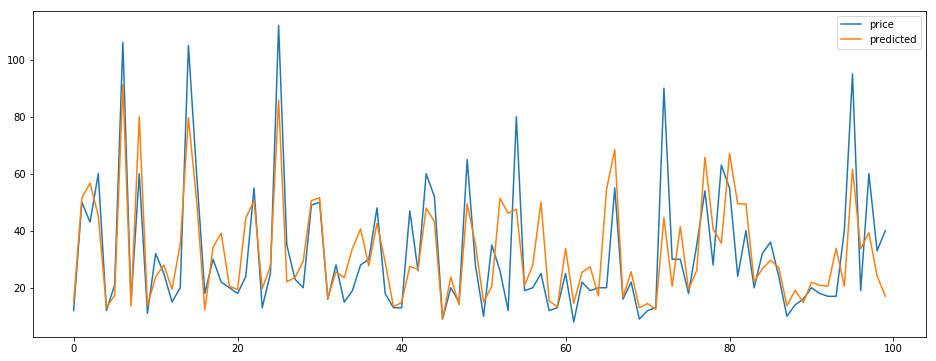

In [8]:
%matplotlib inline
demo_df[['price', 'predicted']].plot.line(figsize=(16,6))